# $\Delta S_{vap}$ and $\Delta S_{fus}$ 
### Neshyba, 2021


## Learning Goals
1. Explain how to examine whether a given differential equation of state corresponds to a path-independent state function
1. Use slicing to evaluate the validity of Trouton's and Richards' rules.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
AssignQuantity = ureg.Quantity
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### Loads the state space

In [3]:
Tgrid = AssignQuantity(np.loadtxt('Tgrid.txt'),'K')
Pgrid = AssignQuantity(np.loadtxt('Pgrid.txt'),'pascal')
Pgrid_bar = Pgrid.to('bar')

### Part 1. Checking for path independence
It would be a cruel joke on you if our entropy surfaces were not *really* entropy, but some path-dependent pretenders. But how do we know? Well, you can literally test for path-inddependence of the thermodynamic surface. Assuming you're working with at T,P state space, for example, how if you compared these:

1. Construct one surface by integrating the slopes *temperature-first*, followed by integrating over the pressure. 
1. Construct another surface by integrating the slopes *pressure-first,* then over temperature. 

If your get the same surface, we would have conclude that the our function is indeed path-independent! In the cells below, you'll consider two differential equations of state, defined by


$$
dA = P dT + T dP
$$

and

$$
dB = \frac 1 {T^2} dT + \frac 1 {TP} dP
$$

One is a path-independent state function, the other isn't (it doesn't even exist)! Which is the pretender? 

Some hints:

- The default for PL.Integrator is *temperature-first*. If you want to make it *pressure-first,* add "axis=1" at the end of the argument list. 
- To simplify matters, leave off the units and the standard state.

What this adds up to is something like

    A_Tfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity)
    A_Pfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=1)
    
Then you could plot them both and see if they look the same.

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/home/instructor/chem340/source/Week_10b.DeltaS/PchemLibrary.py:84: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y
/home/instructor/chem340/source/Week_10b.DeltaS/PchemLibrary.py:93: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[:,i] = integral_along_x


<IPython.core.display.Javascript object>


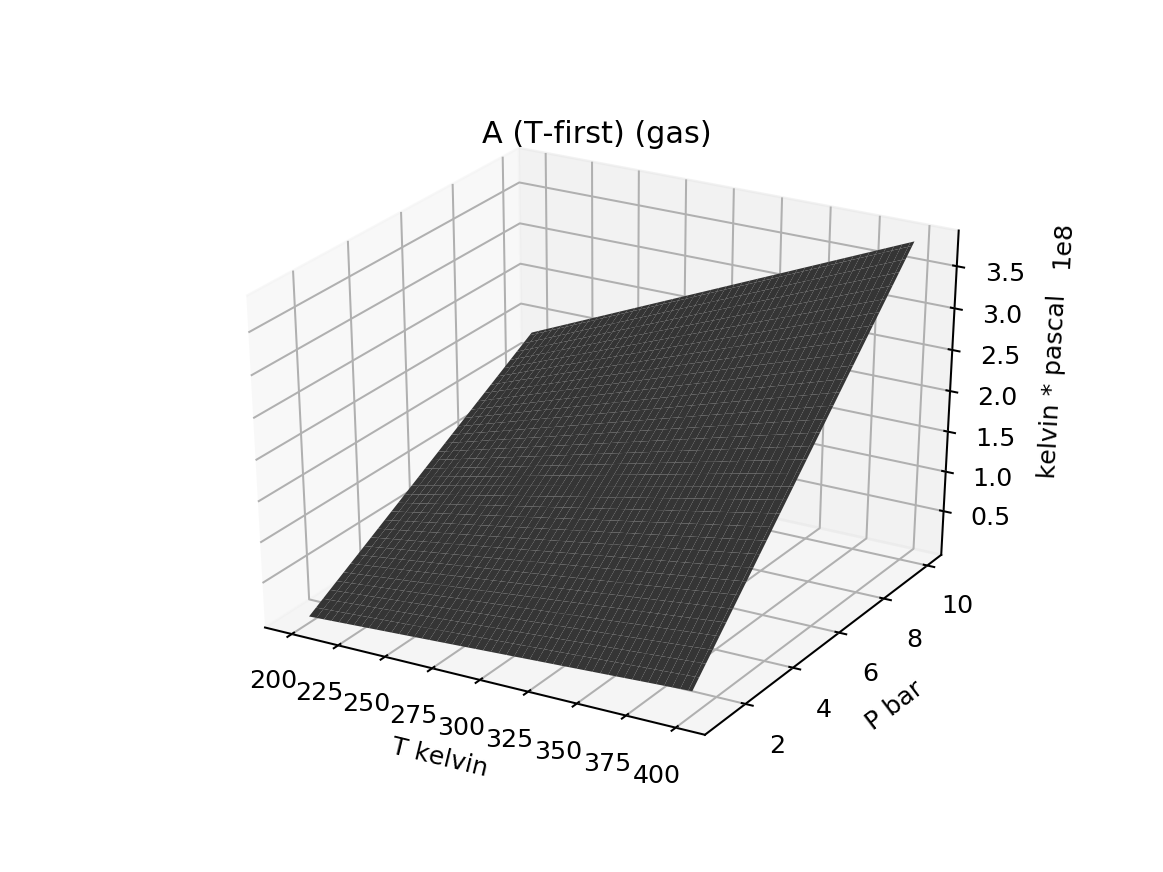

/usr/local/lib/python3.6/dist-packages/numpy/lib/stride_tricks.py:257: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


<IPython.core.display.Javascript object>


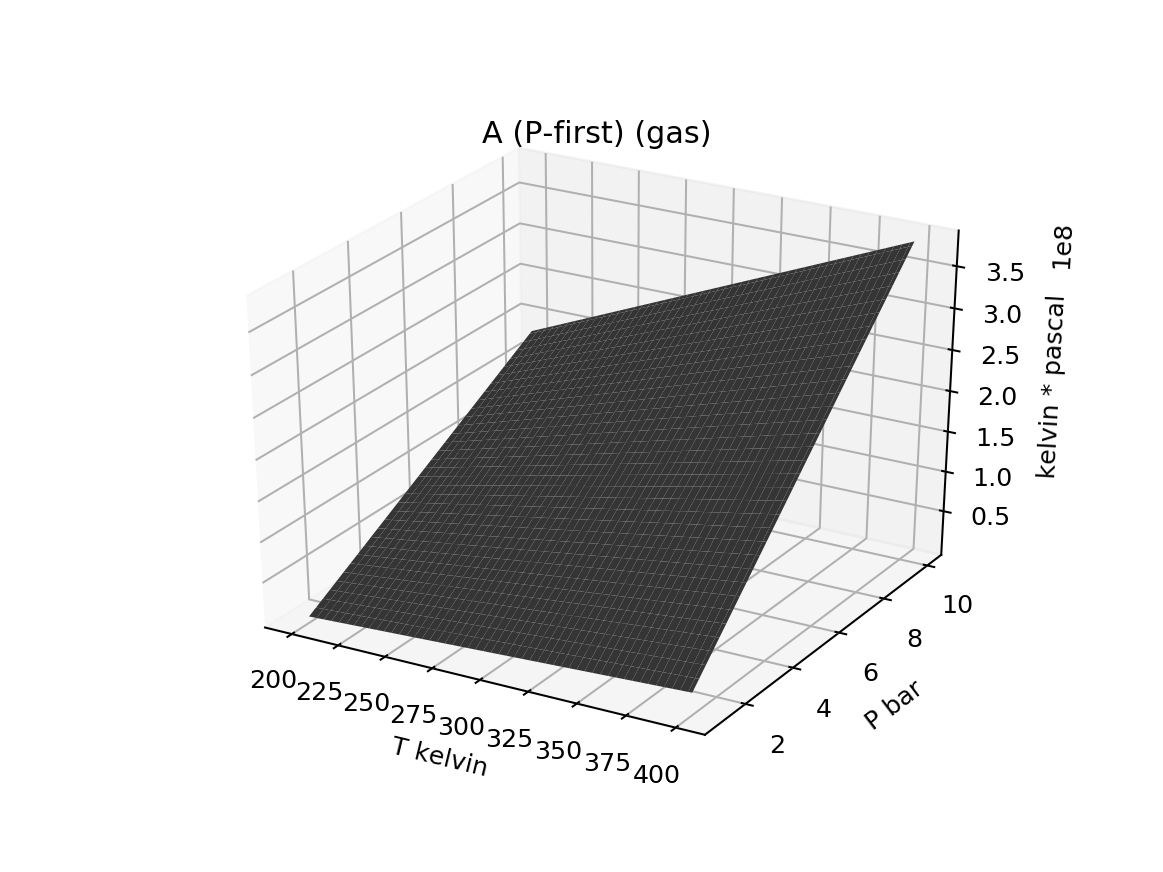

Text(0.5, 0.92, 'A (P-first) (gas)')

In [4]:
# Checking out A
### BEGIN SOLUTION

# Getting the slopes
dAdT = AssignQuantity(Pgrid,'pascal')
dAdP = AssignQuantity(Tgrid,'K')

# Integrating
A_Tfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity)
A_Pfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=1)

# Graphing
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax.plot_surface(Tgrid, Pgrid_bar, A_Tfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Tfirst.units))
ax.set_title('A (T-first) (gas)')

ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax.plot_surface(Tgrid, Pgrid_bar, A_Pfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Pfirst.units))
ax.set_title('A (P-first) (gas)')

### END SOLUTION

<IPython.core.display.Javascript object>


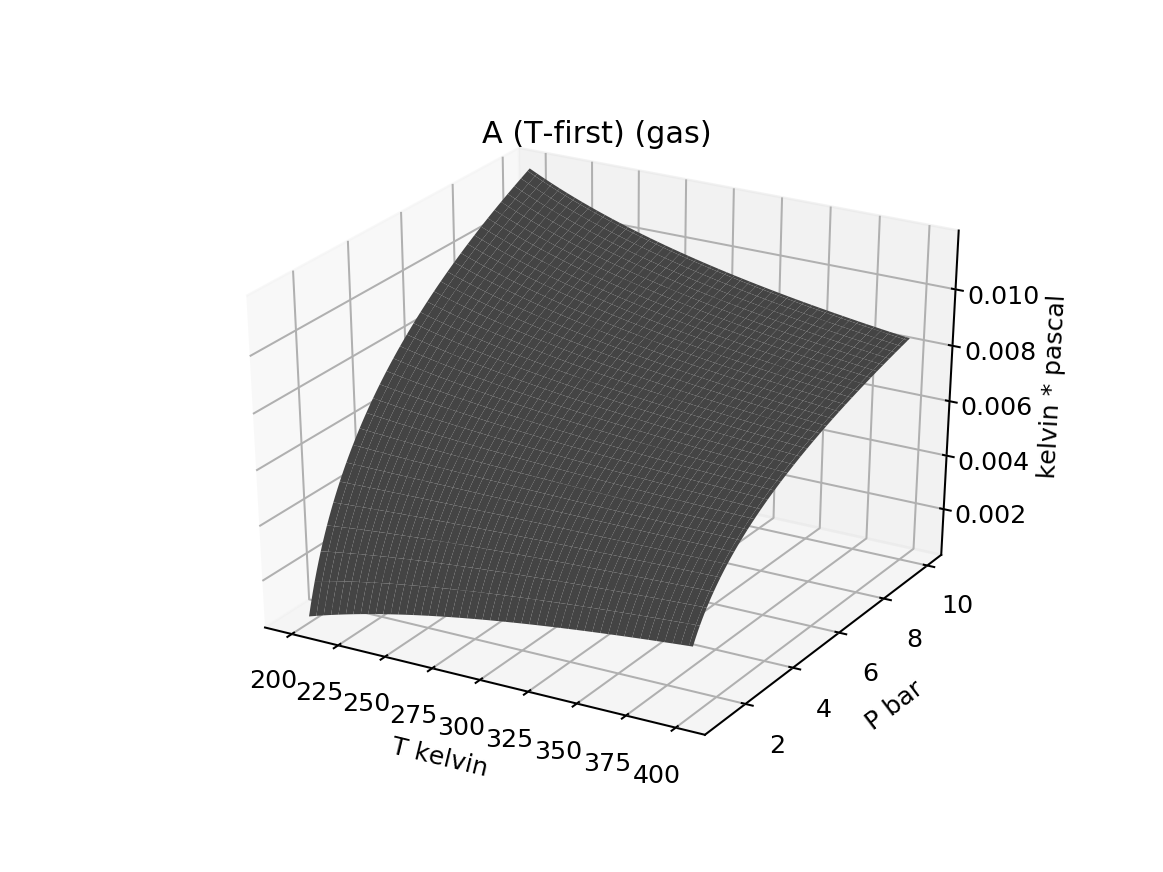

<IPython.core.display.Javascript object>


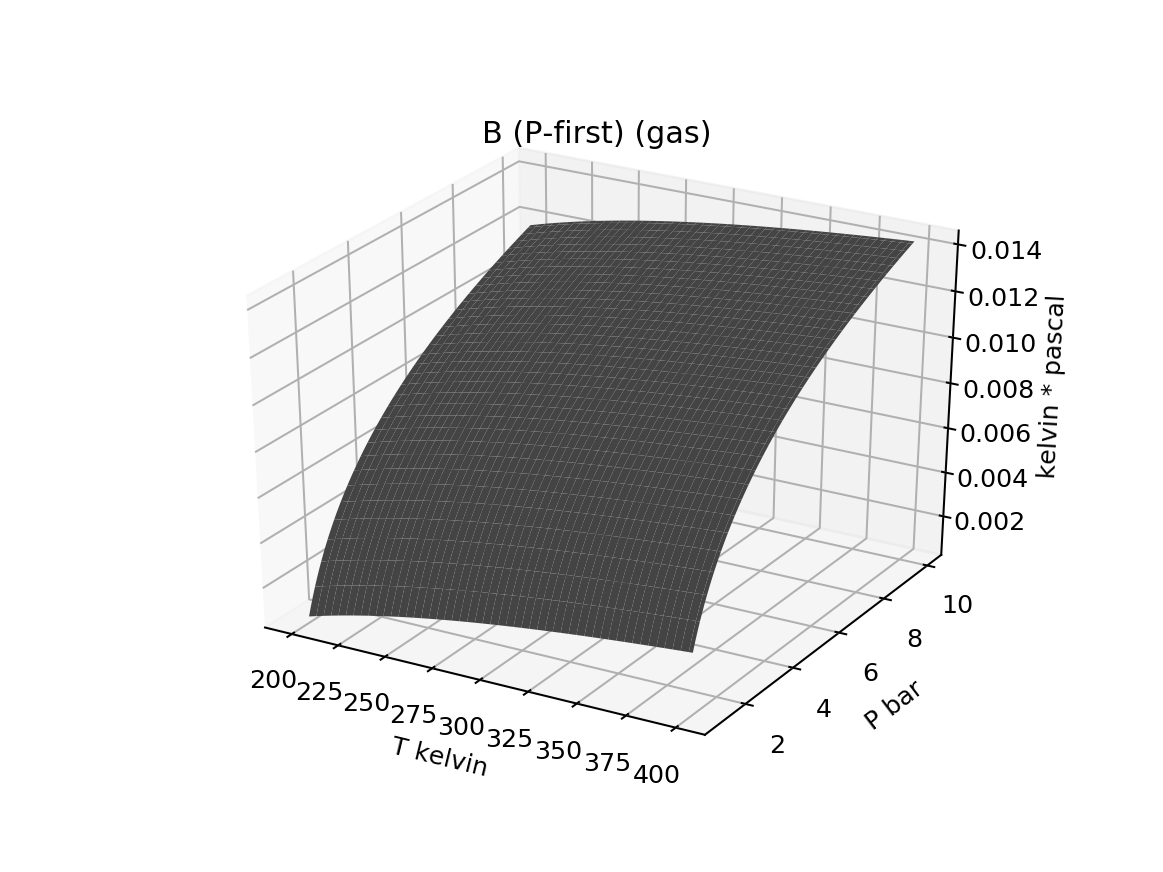

Text(0.5, 0.92, 'B (P-first) (gas)')

In [5]:
# Checking out B
### BEGIN SOLUTION

# Getting the slopes
dBdT = AssignQuantity(1/Tgrid**2,'K^-2')
dBdP = AssignQuantity(1/(Tgrid*Pgrid),'K^-1 pascal^-1')

# Integrating
B_Tfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity)
B_Pfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity, axis=1)

# Graphing
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax.plot_surface(Tgrid, Pgrid_bar, B_Tfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Tfirst.units))
ax.set_title('A (T-first) (gas)')

ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax.plot_surface(Tgrid, Pgrid_bar, B_Pfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Pfirst.units))
ax.set_title('B (P-first) (gas)')

### END SOLUTION

### Pause for analysis
In the cell below, enter you findings about A and B.

### Part 2. Checking up on Trouton and Richards
Execute the cell below to bring us up to speed with where we were in the last CGI.

<IPython.core.display.Javascript object>


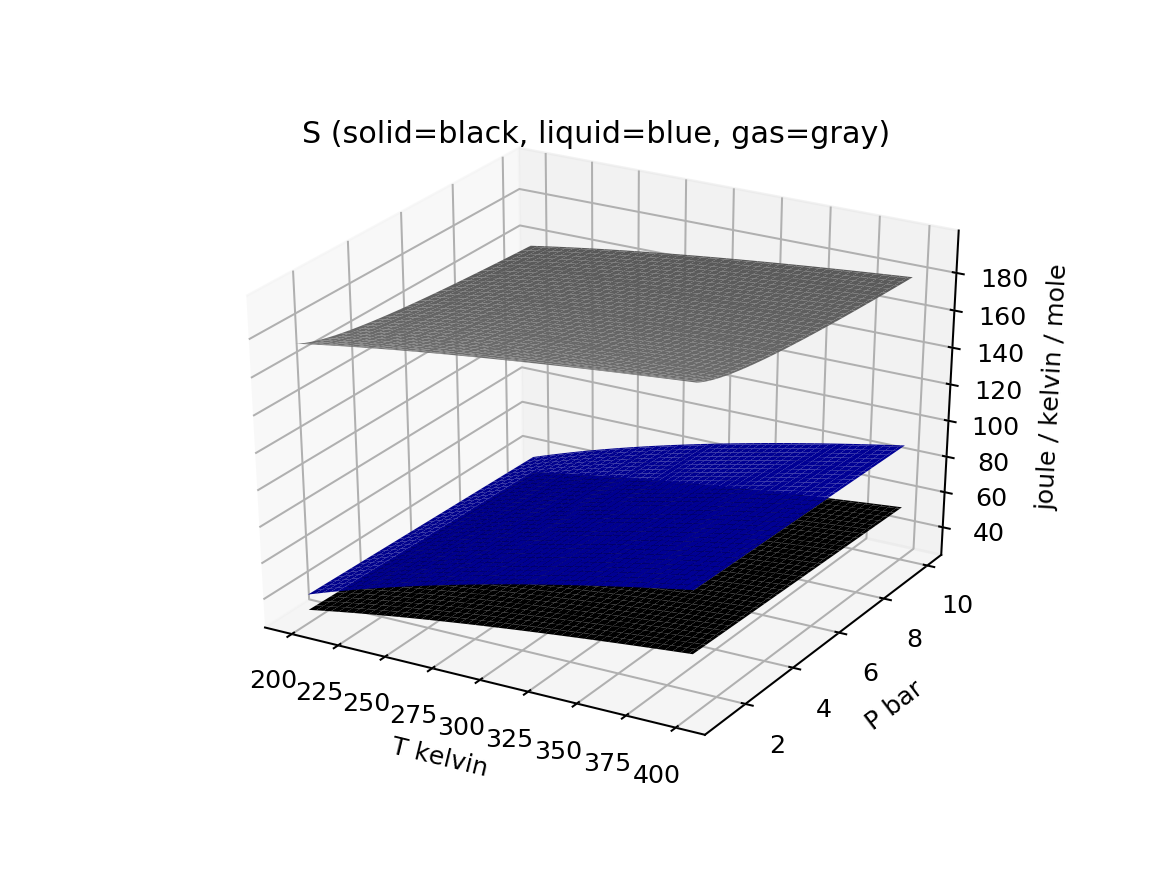

Text(0.5, 0.92, 'S (solid=black, liquid=blue, gas=gray)')

In [6]:
# Load the entropies
S_gas = AssignQuantity(np.loadtxt('S_gas.txt'),'J/mol/K')
S_liq = AssignQuantity(np.loadtxt('S_liq.txt'),'J/mol/K')
S_sol = AssignQuantity(np.loadtxt('S_sol.txt'),'J/mol/K')

# Graphing the entropy of the gas, liquid, and solid
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax.plot_surface(Tgrid, Pgrid_bar, S_gas, color='gray')
ax.plot_surface(Tgrid, Pgrid_bar, S_liq, color='blue')
ax.plot_surface(Tgrid, Pgrid_bar, S_sol, color='black')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(S_liq.units))
ax.set_title('S (solid=black, liquid=blue, gas=gray)')

### Pause for analysis
In the cell below, state your conclusions.

### Part 2. Checking out Trouton and Richards. 
In the cell below, extract the 1st isochore (that's index = 0), of the entropy of all three phases (gas, liquid, and solid ice), and plot them on the same graph as a function of temperature." Then, use the zoom feature to explore the validity of Trouton's rule and Richards' rule (recalling that these predict $\Delta S_{vap}$ at the normal boiling temperature of water, and $\Delta S_{fus}$ at the normal freezing temperature. Enter your conclusions in the cell below that.

<IPython.core.display.Javascript object>


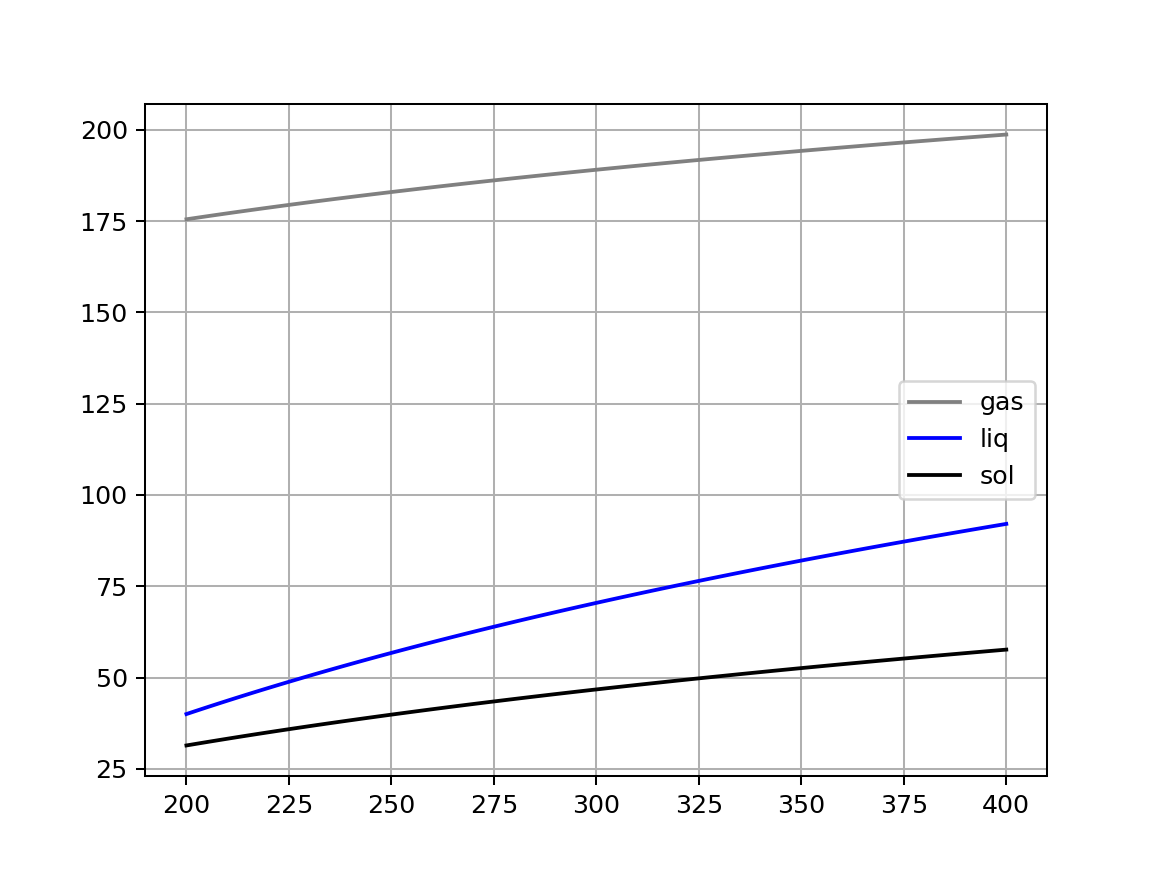

In [7]:
### BEGIN SOLUTION
plt.figure()
plt.plot(Tgrid[:,0],S_gas[:,0], color='gray', label='gas')
plt.plot(Tgrid[:,0],S_liq[:,0], color='blue', label='liq')
plt.plot(Tgrid[:,0],S_sol[:,0], color='black', label='sol')
plt.grid(True)
plt.legend()